In [1]:
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
def monthly_to_annual(array):
    """ calculate annual mena from monthly data, using unequal month lengths fros noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

def savgol_filter(array, window, order=2):
    smooth_array = array.copy()
    smooth_array[:] = scipy.signal.savgol_filter(array, window, order)
    return(smooth_array)

In [4]:
mdls=['ACCESS-ESM1-5','CESM2','GFDL-ESM4','GISS','NorESM2-LM']

In [5]:
expt=['esm-pictrl','1pctco2','flat10','flat10-zec','flat10-cdr']

In [6]:
flds=['tas','co2','nbp','fgco2']

In [7]:
ed={}
for m in mdls:
    ed[m]={}
    for e in expt:
        tmpa=[]
        for f in flds:
            try:
                fl='ESM_data/'+m+'/'+e+'_'+f+'_'+m+'.nc'
                tmp=xr.open_dataset(fl)
                tmpa.append(tmp)
            except:
                0
        ed[m][e]=xr.merge(tmpa)
                
                

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode ti

In [8]:

ed[m][e]

<xarray.Dataset>
Dimensions:  (time: 2640)
Dimensions without coordinates: time
Data variables:
    tas      (time) float64 ...
    date     (time) object 1950-01-16 00:00:00 ... 2169-12-16 00:00:00
    co2      (time) float64 ...
    nbp      (time) float64 ...
    fgco2    (time) float64 ...

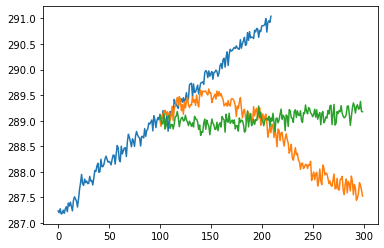

In [9]:
model = 'CESM2'
plt.plot(np.arange(len(ed[model]['flat10']['tas'])), ed[model]['flat10']['tas'].squeeze())
plt.plot(np.arange(len(ed[model]['flat10-cdr']['tas']))+100., ed[model]['flat10-cdr']['tas'].squeeze())
plt.plot(np.arange(len(ed[model]['flat10-zec']['tas']))+100., ed[model]['flat10-zec']['tas'].squeeze())


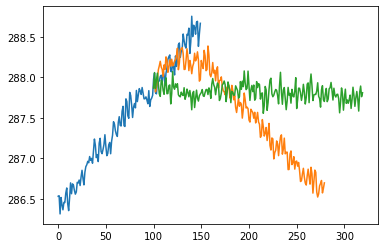

In [10]:
model = 'GFDL-ESM4'
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10']['tas']))), monthly_to_annual(ed[model]['flat10']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-cdr']['tas'])))+100., monthly_to_annual(ed[model]['flat10-cdr']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-zec']['tas'])))+100., monthly_to_annual(ed[model]['flat10-zec']['tas'].squeeze()))


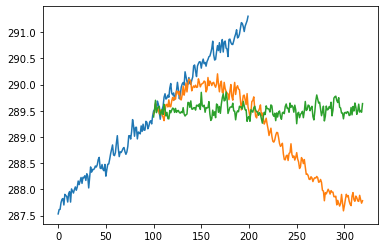

In [11]:
model = 'ACCESS-ESM1-5'
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10']['tas']))), monthly_to_annual(ed[model]['flat10']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-cdr']['tas'])))+100., monthly_to_annual(ed[model]['flat10-cdr']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-zec']['tas'])))+100., monthly_to_annual(ed[model]['flat10-zec']['tas'].squeeze()))


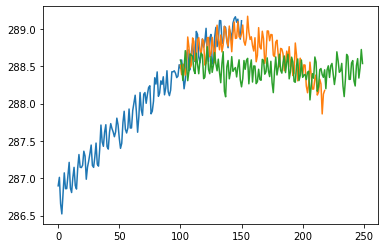

In [12]:
model = 'GISS'
plt.plot(np.arange(len(ed[model]['flat10']['tas'])), ed[model]['flat10']['tas'].squeeze())
plt.plot(np.arange(len(ed[model]['flat10-cdr']['tas']))+100., ed[model]['flat10-cdr']['tas'].squeeze())
plt.plot(np.arange(len(ed[model]['flat10-zec']['tas']))+100., ed[model]['flat10-zec']['tas'].squeeze())


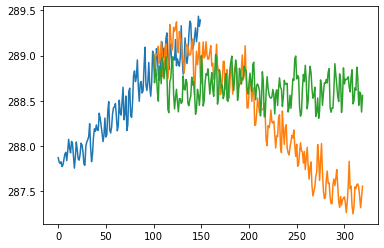

In [13]:
model = 'NorESM2-LM'
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10']['tas']))), monthly_to_annual(ed[model]['flat10']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-cdr']['tas'])))+100., monthly_to_annual(ed[model]['flat10-cdr']['tas'].squeeze()))
plt.plot(np.arange(len(monthly_to_annual(ed[model]['flat10-zec']['tas'])))+100., monthly_to_annual(ed[model]['flat10-zec']['tas'].squeeze()))
